In [3]:
from tqdm import tqdm
import json
from PIL import Image
import pandas as pd

In [4]:
lines = ''
root_dir = '\\\\databrick\\N\\eve_logs'
#root_dir = "O:\\log_dir\\eve_miner"
with open(f"{root_dir}\\databrick_-m_2023-03-25_17-37-18_704880.log") as f:
    lines = f.readlines()

In [5]:
class_lines = []
for line in tqdm(lines):
    if 'Current Screen Classification:' in line or 'Current Screen:' in line:
        index = line.find('{')
        class_lines.append(json.loads(line[index:-1].replace("'", '"').replace('UUID("', '"').replace('")', '"').replace("True", '1').replace("False", '0')))

100%|█████████████████████████████████████████████████████████████████████| 764117/764117 [00:00<00:00, 2243618.16it/s]


In [6]:
len(class_lines)

14886

In [7]:
class_lines[0]

{'argmax_index': 2,
 'value_at_argmax': 0.99999034,
 'pass_general_tollerance': 1,
 'class': 'in_flight',
 'classes': ['char_select', 'connection_lost', 'in_flight', 'in_hanger'],
 'scores': [2.1476587335200747e-06,
  2.6237273687002016e-07,
  0.9999903440475464,
  7.282548722287174e-06],
 'id': 'f33e9837-cb5d-11ed-b56f-9c5c8ec2126c',
 'model': 'game_state'}

In [8]:
df = pd.DataFrame(class_lines)
df

,argmax_index,value_at_argmax,pass_general_tollerance,class,classes,scores,id,model
0,2,0.999990,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[2.1476587335200747e-06, 2.6237273687002016e-0...",f33e9837-cb5d-11ed-b56f-9c5c8ec2126c,game_state
1,2,0.999990,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[2.305072030139854e-06, 2.778216980914294e-07,...",f57c55d9-cb5d-11ed-89be-9c5c8ec2126c,game_state
2,2,0.999990,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[2.1726946215494536e-06, 2.6478508630134456e-0...",f5cec253-cb5d-11ed-ad8d-9c5c8ec2126c,game_state
3,2,0.999996,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[8.854673296809779e-07, 1.7268864382913307e-07...",1fbf9040-cb5e-11ed-bea9-9c5c8ec2126c,game_state
4,2,0.999995,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[1.3243646890259697e-06, 3.241900685679866e-07...",49a8cc69-cb5e-11ed-969d-9c5c8ec2126c,game_state
...,...,...,...,...,...,...,...,...
14881,2,0.999991,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[1.1320006478854339e-06, 3.255491947129485e-07...",4a7c1a16-ce81-11ed-9298-9c5c8ec2126c,game_state
14882,3,0.999572,1,in_hanger,"[char_select, connection_lost, in_flight, in_h...","[6.578908937626693e-07, 8.370328941964544e-06,...",94e04e2c-ce82-11ed-b1b3-9c5c8ec2126c,game_state
14883,2,0.999999,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[7.14285945946358e-08, 4.827857935651991e-08, ...",bc326cf8-ce82-11ed-9520-9c5c8ec2126c,game_state
14884,2,1.000000,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[9.973539505381268e-08, 6.999349722036641e-08,...",bea085e8-ce82-11ed-8e93-9c5c8ec2126c,game_state


In [9]:
df = df.sort_values(by='value_at_argmax', ascending=True).reset_index()
del df['index']
df

,argmax_index,value_at_argmax,pass_general_tollerance,class,classes,scores,id,model
0,2,0.504212,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[0.00114559440407902, 0.49248093366622925, 0.5...",3681a193-cc83-11ed-9949-9c5c8ec2126c,game_state
1,2,0.506754,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[0.0012075714766979218, 0.48996537923812866, 0...",4e0842a6-cc83-11ed-943c-9c5c8ec2126c,game_state
2,2,0.507455,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[0.0010907409014180303, 0.4891653060913086, 0....",32929543-cc83-11ed-ba58-9c5c8ec2126c,game_state
3,2,0.511931,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[0.0011468937154859304, 0.484855979681015, 0.5...",46338a88-cc83-11ed-8e8f-9c5c8ec2126c,game_state
4,2,0.515010,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[0.001099179731681943, 0.4817993938922882, 0.5...",2eb2c9d6-cc83-11ed-b0cf-9c5c8ec2126c,game_state
...,...,...,...,...,...,...,...,...
14881,2,1.000000,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[7.356847930850563e-08, 3.688975525051319e-08,...",07b87d4d-cd48-11ed-8f08-9c5c8ec2126c,game_state
14882,2,1.000000,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[5.7163653366387734e-08, 3.505311596541105e-08...",e33d040a-cda1-11ed-addc-9c5c8ec2126c,game_state
14883,2,1.000000,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[4.2651240761415465e-08, 2.12283346456843e-08,...",066e1cfb-cc33-11ed-9f09-9c5c8ec2126c,game_state
14884,2,1.000000,1,in_flight,"[char_select, connection_lost, in_flight, in_h...","[4.4747334726480403e-08, 2.7276339409354478e-0...",27315d84-cb8b-11ed-87b2-9c5c8ec2126c,game_state


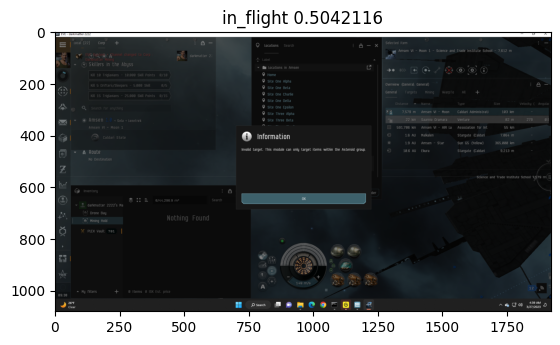

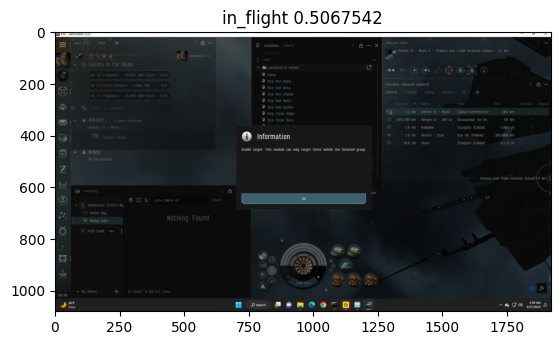

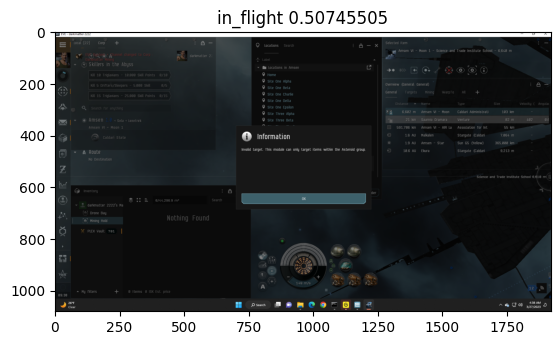

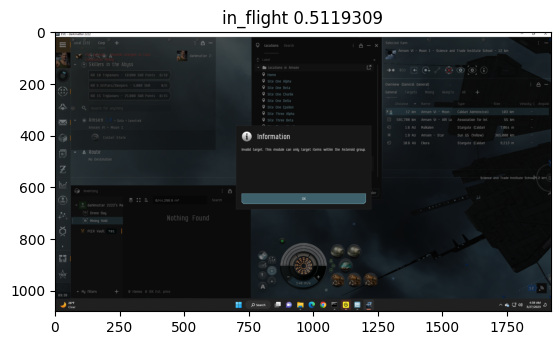

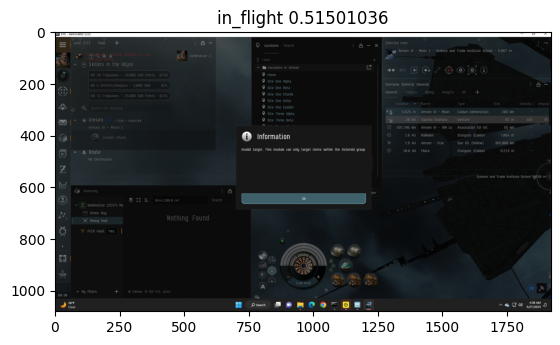

In [10]:
import matplotlib.pyplot as plt
for i in df[0:5].index:
    im = Image.open(f"{root_dir}\\images\\{df.loc[i, 'id']}.png")
    plt.figure()
    plt.title(df.loc[i, 'class'] + ' ' + str(df.loc[i, 'value_at_argmax']))
    plt.imshow(im)

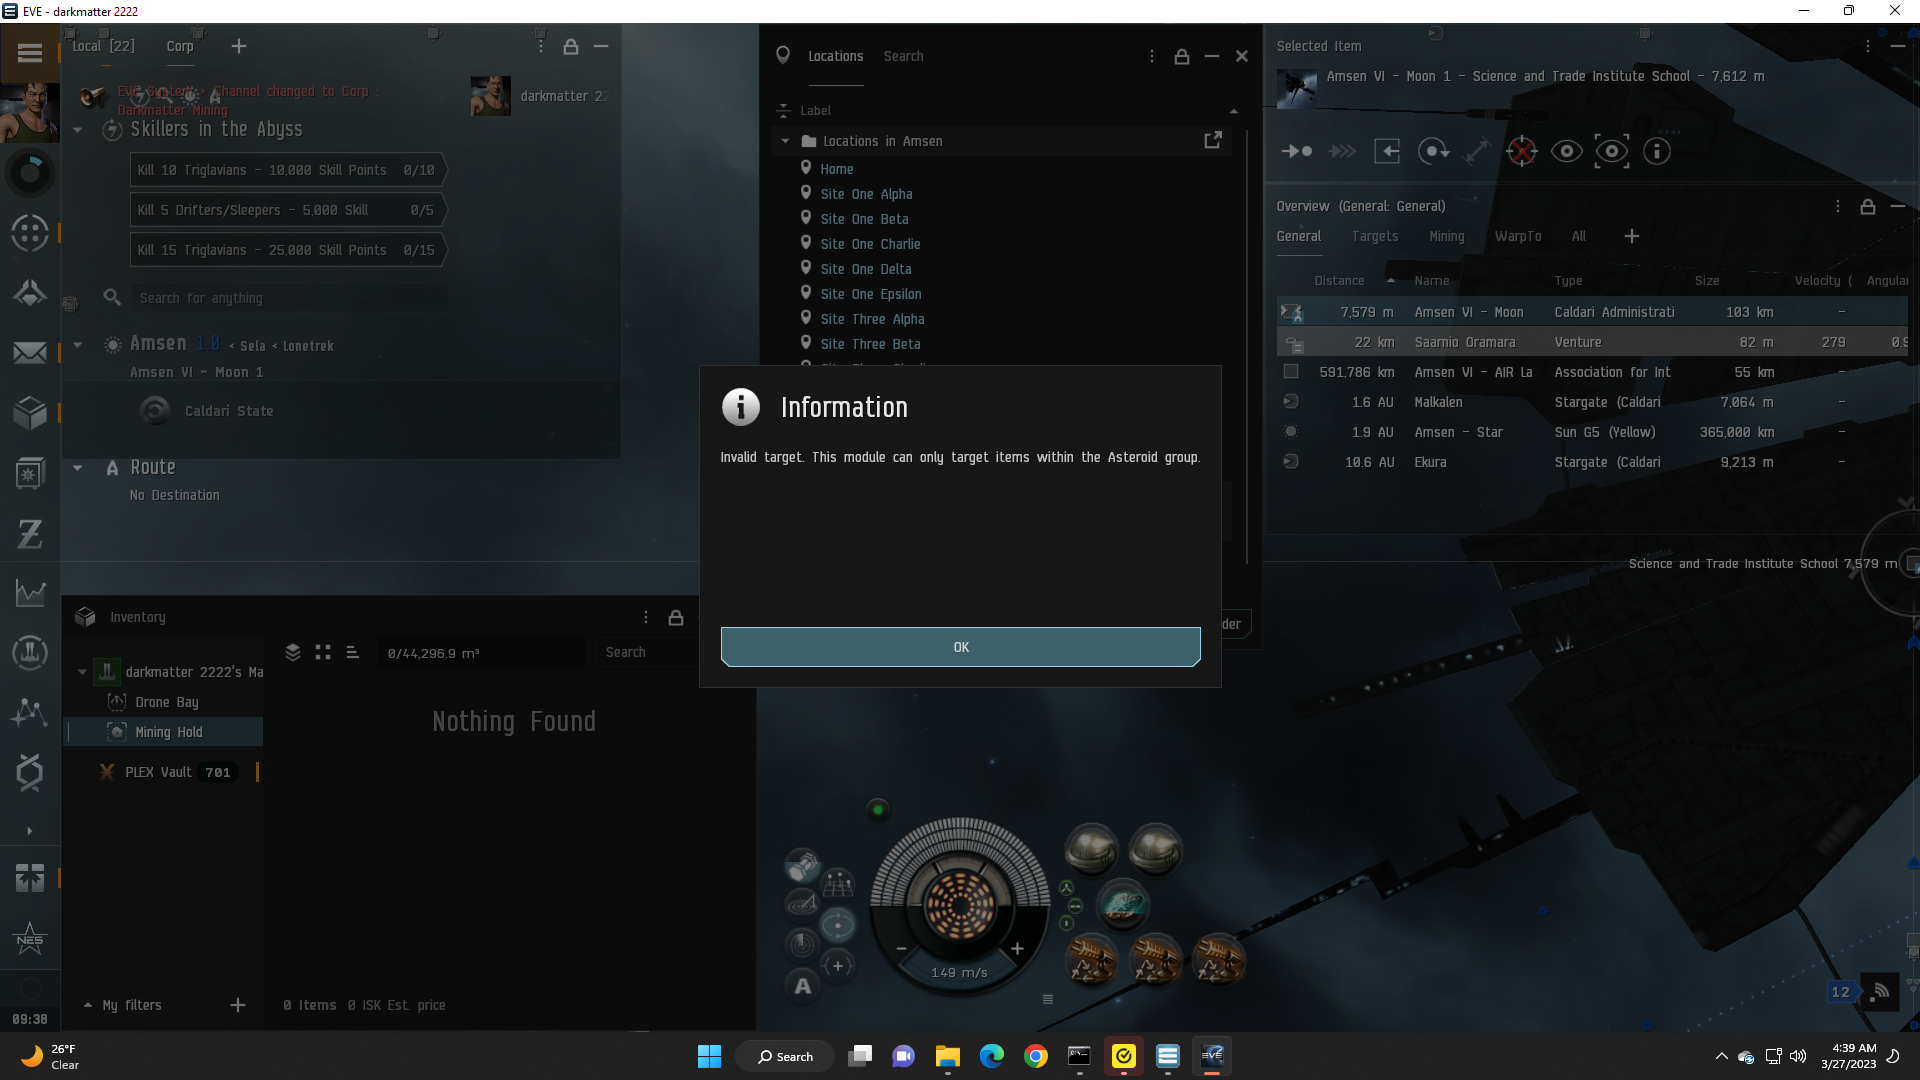

In [11]:
im = Image.open(f"{root_dir}\\images\\{df.loc[0, 'id']}.png")
im

In [14]:
low_performing_list = df[df['value_at_argmax']<=.9]['id'].tolist()
low_performing_list
#Image.open(f"{root_dir}\\{df[0:2]['id'].tolist()[0]}.png")

['3681a193-cc83-11ed-9949-9c5c8ec2126c',
 '4e0842a6-cc83-11ed-943c-9c5c8ec2126c',
 '32929543-cc83-11ed-ba58-9c5c8ec2126c',
 '46338a88-cc83-11ed-8e8f-9c5c8ec2126c',
 '2eb2c9d6-cc83-11ed-b0cf-9c5c8ec2126c',
 '45339354-cc89-11ed-9e12-9c5c8ec2126c',
 '51eef6e7-cc83-11ed-b26d-9c5c8ec2126c',
 '4d9b07a9-cc89-11ed-a091-9c5c8ec2126c',
 '4948c13c-cc89-11ed-a6b5-9c5c8ec2126c',
 '490417c6-cc89-11ed-a8af-9c5c8ec2126c',
 '4a56f5c4-cc85-11ed-b04f-9c5c8ec2126c',
 '446bf577-cc89-11ed-85f6-9c5c8ec2126c',
 '44f1e22e-cc89-11ed-80a5-9c5c8ec2126c',
 '55daf36d-cc83-11ed-b4ad-9c5c8ec2126c',
 '44aec686-cc89-11ed-a26d-9c5c8ec2126c',
 '49d2e5f6-cc89-11ed-befa-9c5c8ec2126c',
 '4a192a31-cc83-11ed-bb16-9c5c8ec2126c',
 '405c8fed-cc89-11ed-bb8b-9c5c8ec2126c',
 '61cfd327-cc85-11ed-9013-9c5c8ec2126c',
 '1eea3432-cc83-11ed-9b6b-9c5c8ec2126c',
 '498d6fc7-cc89-11ed-a5f1-9c5c8ec2126c',
 'f8c8a9f9-cc84-11ed-a6c4-9c5c8ec2126c',
 'd1e95ef0-cc84-11ed-8ed2-9c5c8ec2126c',
 '3fcea7bd-cc89-11ed-be21-9c5c8ec2126c',
 'e944927e-cc84-

In [15]:
import shutil
for item in low_performing_list:
    shutil.move(f"{root_dir}\\images\\{item}.png", f"O:\\eve_models\\training_data\\unclass\\{item}.png")